**Построение доверительных интервалов и проверка гипотез для параметров
нормальной генеральной совокупности**
Вариант 1

## Загрузка данных

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import chi2, f
import seaborn as sns

In [135]:
# Таблица 1
data = np.array([
[-2.70,6.07,9.97,-0.79,4.68,-1.69,8.74,2.87,-6.27],
[-0.34,8.02,7.65,1.86,5.00,-7.00,3.12,2.44,-0.10],
[1.29,4.84,6.81,0.50,1.79,-5.15,6.31,4.90,-2.33],
[-7.22,3.38,7.88,1.81,4.53,-6.17,5.25,3.12,-2.71],
[3.46,10.84,3.06,5.52,7.15,-7.10,1.09,1.54,0.42],
[-8.85,2.90,8.24,-5.27,3.89,-2.30,2.68,1.49,0.32],
[-7.25,4.39,7.96,-1.25,4.31,-2.90,3.89,1.80,-2.44],
[-2.21,6.89,7.12,2.93,4.93,-6.84,5.12,3.06,-2.55],
[-3.73,1.96,5.95,2.79,3.12,-1.69,4.17,3.66,-2.30],
[-3.92,5.23,9.58,-0.39,3.39,-4.58,5.20,2.91,-2.60],
[-3.29,1.85,5.94,-3.94,2.00,-1.00,2.42,2.90,0.47],
[0.34,5.82,6.68,-3.92,1.29,-3.32,1.43,3.70,2.99],
[-3.13,3.22,5.02,-1.68,3.01,-1.88,4.58,2.91,-2.63],
[0.36,7.54,8.26,-1.04,4.41,-3.88,2.00,1.70,0.83],
[-1.30,6.45,4.59,-6.97,2.92,-6.02,4.74,3.13,-0.12],
[-8.00,4.21,6.57,5.92,4.04,-5.23,2.71,3.23,-1.79],
[-1.54,5.40,9.88,-1.70,4.37,-4.00,10.79,3.03,-7.26],
[-4.05,6.89,10.62,3.13,3.65,-7.21,5.54,4.18,-1.69],
[5.48,9.09,6.83,3.52,1.98,-6.17,4.74,5.42,-1.64],
[-4.94,4.81,5.19,1.00,3.95,-3.92,0.20,1.67,0.41],
[-7.18,5.70,11.81,-0.68,4.20,-3.65,4.48,2.25,-1.77],
[4.48,5.49,9.71,-1.69,2.06,-5.72,3.38,3.02,-1.64],
[0.02,4.88,7.41,1.86,2.78,-3.90,6.30,4.53,-3.76],
[-2.06,3.53,7.76,-4.46,3.27,-3.85,4.70,2.78,-0.02],
[-1.85,5.95,8.34,-3.92,3.82,-6.25,2.38,3.45,-2.91],
[2.53,4.96,3.84,-4.12,3.41,-2.51,0.03,1.91,3.53],
[-2.30,7.61,10.78,6.80,4.36,-5.86,5.03,4.00,-2.62],
[-8.38,2.16,9.84,-3.04,2.21,-4.72,4.73,4.26,-1.12],
[2.30,10.68,11.42,4.70,4.67,-6.22,7.72,3.74,-4.90],
[4.91,3.78,8.49,-1.66,2.36,-1.07,7.24,3.92,-2.30],
])

df = pd.DataFrame(data, columns=[f"X{i}" for i in range(1,10)])
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,-2.70,6.07,9.97,-0.79,4.68,-1.69,8.74,2.87,-6.27
1,-0.34,8.02,7.65,1.86,5.00,-7.00,3.12,2.44,-0.10
2,1.29,4.84,6.81,0.50,1.79,-5.15,6.31,4.90,-2.33
3,-7.22,3.38,7.88,1.81,4.53,-6.17,5.25,3.12,-2.71
4,3.46,10.84,3.06,5.52,7.15,-7.10,1.09,1.54,0.42
5,-8.85,2.90,8.24,-5.27,3.89,-2.30,2.68,1.49,0.32
6,-7.25,4.39,7.96,-1.25,4.31,-2.90,3.89,1.80,-2.44
7,-2.21,6.89,7.12,2.93,4.93,-6.84,5.12,3.06,-2.55
8,-3.73,1.96,5.95,2.79,3.12,-1.69,4.17,3.66,-2.30
9,-3.92,5.23,9.58,-0.39,3.39,-4.58,5.20,2.91,-2.60


In [136]:
# Таблица 2
cov_data = np.array([
[18.37, 3.75, -2.81, -1.67, -1.91, 1.16, 2.41, 1.35, -1.15],
[3.75, 3.13, -0.25, 2.38, 0.49, -1.40, -0.64, 0.17, 0.50],
[-2.81, -0.25, 4.61, 0.22, -0.35, -0.34, 2.85, 0.78, -1.96],
[-1.67, 2.38, 0.22, 11.78, 1.66, -2.26, -2.25, 0.51, -0.22],
[-1.91, 0.49, -0.35, 1.66, 1.61, -0.14, -1.19, -1.03, 0.30],
[1.16, -1.40, -0.34, -2.26, -0.14, 2.85, 0.40, -0.64, -0.77],
[2.41, -0.64, 2.85, -2.25, -1.19, 0.40, 6.49, 1.52, -5.00],
[1.35, 0.17, 0.78, 0.51, -1.03, -0.64, 1.52, 1.22, -0.82],
[-1.15, 0.50, -1.96, -0.22, 0.30, -0.77, -5.00, -0.82, 5.00],
])

cov_df = pd.DataFrame(cov_data, index=[f"X{i}" for i in range(1,10)], columns=[f"X{i}" for i in range(1,10)])
cov_df

,X1,X2,X3,X4,X5,X6,X7,X8,X9
X1,18.37,3.75,-2.81,-1.67,-1.91,1.16,2.41,1.35,-1.15
X2,3.75,3.13,-0.25,2.38,0.49,-1.40,-0.64,0.17,0.50
X3,-2.81,-0.25,4.61,0.22,-0.35,-0.34,2.85,0.78,-1.96
X4,-1.67,2.38,0.22,11.78,1.66,-2.26,-2.25,0.51,-0.22
X5,-1.91,0.49,-0.35,1.66,1.61,-0.14,-1.19,-1.03,0.30
X6,1.16,-1.40,-0.34,-2.26,-0.14,2.85,0.40,-0.64,-0.77
X7,2.41,-0.64,2.85,-2.25,-1.19,0.40,6.49,1.52,-5.00
X8,1.35,0.17,0.78,0.51,-1.03,-0.64,1.52,1.22,-0.82
X9,-1.15,0.50,-1.96,-0.22,0.30,-0.77,-5.00,-0.82,5.00


In [137]:
# Таблица 3
mu_data = np.array([3.5, -2.5, 0.0, -1.7, 0.5, 2.3, 1.5, 4.35, -1.25])
print(*mu_data)

3.5 -2.5 0.0 -1.7 0.5 2.3 1.5 4.35 -1.25


In [138]:
# Таблица 4
data_new = np.array([
    [5.81, 10.52, 20.32, 24.50, 34.21, 24.52, 18.44, 6.72, -2.31],
    [11.01, 10.25, 21.14, 18.26, 16.41, 13.47, 9.95, 2.56, -5.96],
    [8.17, 13.77, 21.43, 15.28, 17.63, -0.12, 3.80, 5.49, 10.23],
    [-1.67, 9.64, 10.61, 22.17, 30.17, 30.00, 3.03, 1.60, -5.88],
    [9.41, 14.57, 17.84, 10.57, 24.10, 18.14, 16.43, 12.31, 0.60],
    [9.18, -3.45, 5.09, 20.46, 29.02, 10.22, 14.51, 18.85, 15.72],
    [0.52, 9.36, 10.16, 16.02, 19.31, 9.30, 17.32, 11.34, 6.54],
    [-2.68, 8.21, 9.87, 18.43, 31.13, 17.91, 17.15, 7.69, 1.22],
    [5.19, -3.59, 8.93, 9.41, 14.28, 12.62, 17.84, 12.61, 17.64],
    [6.22, 22.13, 22.78, 22.42, 32.34, 22.56, 14.78, 15.24, 9.98],
    [4.12, -0.67, 14.26, 18.18, 25.93, 14.29, 8.11, 14.22, 3.43],
    [-3.44, 11.70, 13.76, 13.28, 29.30, 6.21, 10.68, 11.21, 5.64],
    [10.55, 12.23, 17.02, 32.52, 26.31, 24.46, 15.43, 2.80, -1.20],
    [1.04, 17.84, 21.53, 21.25, 14.64, 13.79, 7.09, 8.00, 2.46],
    [9.58, 10.94, 16.72, 22.99, 24.18, 17.18, 10.37, 4.17, 0.78],
    [2.03, -0.29, 2.13, 16.38, 26.67, 14.10, 12.22, 4.27, 0.72],
    [8.86, 11.06, 26.19, 30.55, 30.73, 31.70, 23.16, 14.87, 15.46],
    [5.09, 15.99, 13.98, 22.25, 26.77, 19.07, 8.27, 14.62, 12.79],
    [6.74, 10.24, 9.49, 22.64, 26.33, 21.36, 23.77, 7.71, -1.65],
    [5.81, 11.94, 21.51, 13.06, 21.67, 13.44, 7.67, 10.08, 5.86],
    [2.91, 11.25, 20.83, 26.27, 21.57, 16.64, 9.47, 12.41, -3.03],
    [10.05, 7.60, 13.89, 23.94, 17.28, 6.55, 20.36, 12.36, 5.95],
    [-1.74, 18.91, 14.80, 24.90, 18.47, 18.28, 12.00, 3.93, 0.43],
    [13.44, -0.29, 15.42, 27.10, 28.69, 19.00, 18.06, 11.67, -0.47],
    [3.11, 10.60, 17.33, 16.47, 30.61, 21.54, 16.77, 6.52, -1.69],
    [9.75, 5.61, 23.48, 23.71, 30.45, 12.21, 11.17, 5.61, -2.85],
    [4.43, 14.41, 15.60, 18.31, 27.11, 19.44, 9.01, 4.84, 6.25],
    [5.16, 17.78, 14.99, 25.38, 21.19, 27.29, 16.18, 8.20, 8.99],
    [-2.66, 16.13, 6.28, 19.42, 25.31, 20.43, 15.57, 1.53, -0.31],
    [-0.09, 7.20, 14.07, 20.62, 23.51, 10.13, 8.72, 3.65, -4.31]
])

df_new = pd.DataFrame(data_new, columns=[f"X{i}" for i in range(1,10)])
df_new

,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,5.81,10.52,20.32,24.50,34.21,24.52,18.44,6.72,-2.31
1,11.01,10.25,21.14,18.26,16.41,13.47,9.95,2.56,-5.96
2,8.17,13.77,21.43,15.28,17.63,-0.12,3.80,5.49,10.23
3,-1.67,9.64,10.61,22.17,30.17,30.00,3.03,1.60,-5.88
4,9.41,14.57,17.84,10.57,24.10,18.14,16.43,12.31,0.60
5,9.18,-3.45,5.09,20.46,29.02,10.22,14.51,18.85,15.72
6,0.52,9.36,10.16,16.02,19.31,9.30,17.32,11.34,6.54
7,-2.68,8.21,9.87,18.43,31.13,17.91,17.15,7.69,1.22
8,5.19,-3.59,8.93,9.41,14.28,12.62,17.84,12.61,17.64
9,6.22,22.13,22.78,22.42,32.34,22.56,14.78,15.24,9.98


## Задание 1

1. По выборке из двумерной нормальной совокупности $\{X_1,X_2\}$ (таблица 1) построить доверительную область уровня $\beta = 0.92$ для вектора средних, если матрица ковариаций: а) известна (таблица 2); б) неизвестна.

а) Матрица ковариаций известна

Тогда доверительная область для компонент вектора средних определяется неравенством:

$$
n(\bar{\mathbf{X}} - \boldsymbol{\mu})^\top A^{-1} (\bar{\mathbf{X}} - \boldsymbol{\mu}) \leq \tau_{\beta} ,
$$

где:
* $\tau_{\beta}$ - квантиль $\chi_{k}^{2}$ уровня $\beta$.

In [139]:
# Наблюдения
df_first = df.loc[:, ['X1', 'X2']]

# Ковариационная матрица
cov_first = cov_df.loc[['X1', 'X2'], ['X1', 'X2']]

n = 30 # Число наблюдений
k = 2 # Размерность вектора многомерного нормального распределения
beta = 0.92 # Доверительная вероятность

# Выборочные средние
mean_first = df_first.mean().values

# Критическое значения хи-квадрат
chi2_crit = chi2.ppf(beta, df=k)

print(f'Вектор выборочных средних: {mean_first}')
print(f'Квантиль хи-квадрат уровня 0.92: {chi2_crit}')

Вектор выборочных средних: [-1.969       5.48466667]
Квантиль хи-квадрат уровня 0.92: 5.051457288616512


Построим эллипс, удовлетворяющий данному неравенству.

---

Стандартная каноническая форма эллипса:

$$ \frac{x^2}{a^2} + \frac{y^2}{b^2} = 1 $$

Его можно записать как:

$$ x^{\top} (D^{-2}) x = 1, \quad D = \begin{pmatrix} a & 0 \\ 0 & b \end{pmatrix} $$

Отсюда следует:

$$ x = Du, \quad \|u\| = 1 $$

То есть:

$$ \begin{pmatrix} x \\ y \end{pmatrix} = \begin{pmatrix} a & 0 \\ 0 & b \end{pmatrix} \begin{pmatrix} \cos\theta \\ \sin\theta \end{pmatrix} $$

Это эллипс с полуосями $a, b$ без поворота.

---

Пусть имеется симметричная матрица: $A$.

Тогда по спектральной теореме:

$$ A = E\Lambda E^{\top} $$

где:
- $E$ — ортонормированная матрица собственных векторов (поворот),
- $\Lambda = \mathrm{diag}(\lambda_1, \lambda_2)$ — собственные значения (масштаб).

---

Множество точек:

$$ \bar{\mathbf{X}} = \{ \boldsymbol{\mu} + E\Lambda^{1/2}u : \|u\| = 1 \} $$

является эллипсом, ориентированным вдоль собственных векторов A, с полуосями $\sqrt{\lambda_1}, \sqrt{\lambda_2}$.

---

Доказательство.

Введём замену:

$$ x = \mu + E\Lambda^{1/2}u $$

Тогда:

$$ x - \mu = E\Lambda^{1/2}u $$

Подставляем в квадратичную форму эллипса:

$$ (x - \mu)^{\top} A^{-1}(x - \mu) = u^{\top} \Lambda^{1/2} E^{\top} (E\Lambda E^{\top})^{-1} E \Lambda^{1/2} u $$

Используем ортонормированность $E^{\top} E = I$:

$$ u^{\top} \Lambda^{1/2} \Lambda^{-1} \Lambda^{1/2} u = u^{\top} I u = 1 $$

Следовательно:

$$ (x - \mu)^{\top} A^{-1}(x - \mu) = 1 $$

☐ Доказано.

In [140]:
def plot_confidence_ellipse_1(df, cov_matrix, beta):

  # Число наблюдений
  n = df.shape[0]

  # Размерность вектора многомерного нормального распределения
  k = df.shape[1]

  # Выборочные средние
  mean = df.mean().values

  # Вычисление критического значения при заданной доверительной вероятности
  quantile = chi2.ppf(beta, df=k)

  # Вычисляем собственные векторы и собственные значения матрицы ковариаций
  eigvals, eigvecs = np.linalg.eigh(cov_matrix)

  # Масштабируем собственные значения
  axes_lengths = np.sqrt(eigvals * quantile / n)

  # Углы для окружности
  theta = np.linspace(0, 2*np.pi, 360)

  # Единичная окружность
  circle = np.array([np.cos(theta), np.sin(theta)])

  # Эллипс
  ellipse = (eigvecs @ np.diag(axes_lengths) @ circle) + mean.reshape(k, 1)

  # График
  plt.figure(figsize=(7, 7))

  plt.plot(ellipse[0], ellipse[1], 'r', label=f'Доверительная область уровня {beta}')
  plt.scatter(df['X1'], df['X2'], alpha=0.5, label='Данные')
  plt.scatter(mean[0], mean[1], color='black', label='Выборочное среднее')

  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.title('Доверительная область для вектора средних (матрица ковариаций известна)')
  plt.legend()
  plt.grid(True)
  plt.axis('equal')
  plt.show()

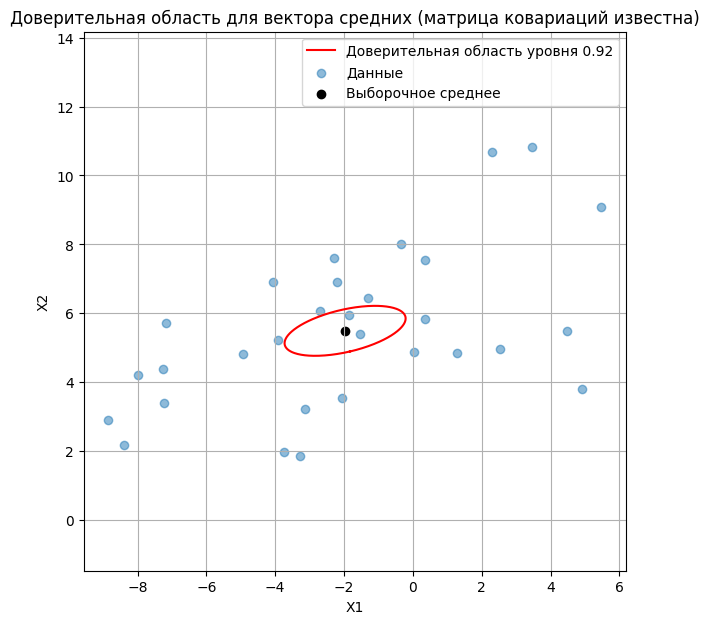

In [141]:
plot_confidence_ellipse_1(df_first, cov_first, beta=0.92)

б) Матрица ковариаций неизвестна

Будем использовать несмещенную оценку для матрицы ковариаций $ S = \frac{1}{n-1} \sum_{i=1}^n (X_i - \boldsymbol{\mu})(X_i - \boldsymbol{\mu})^{\top} $.

Тогда доверительная область для компонент вектора средних определяется неравенством:

$$ n(\bar{X} - \mu)^{\top} S^{-1}(\bar{X} - \mu) < \frac{k(n-1)}{n-k} F_{k,n-k}(\beta) $$

где:
*   $F_{k,n-k}$ - квантиль распределения Фишера–Снедекора;
*   $T^{2} = \frac{k(n-1)}{n-k} F_{k,n-k}(\beta)$ - квантиль распределения Хотеллинга.



In [142]:
# Критическое значения распределения Хоттелинга
F_quantile = f.ppf(beta, dfn=k, dfd=n-k)
T2_quantile = (k * (n - 1) / (n - k)) * F_quantile
print(f'Квантиль распределения Хотеллинга уровня 0.92: {T2_quantile}')

Квантиль распределения Хотеллинга уровня 0.92: 5.733513190448547


In [143]:
def plot_confidence_ellipse_2(df, beta):

  # Число наблюдений
  n = df.shape[0]

  # Размерность вектора многомерного нормального распределения
  k = df.shape[1]

  # Выборочные средние
  mean = df.mean().values

  # Оценака для матрицы ковариаций
  cov_matrix = df.cov()

  # Вычисление критического значения при заданной доверительной вероятности
  F_quantile = f.ppf(beta, dfn=k, dfd=n-k)
  T2_quantile = (k * (n - 1) / (n - k)) * F_quantile

  # Вычисляем собственные векторы и собственные значения матрицы ковариаций
  eigvals, eigvecs = np.linalg.eigh(cov_matrix)

  # Масштабируем собственные значения
  axes_lengths = np.sqrt(eigvals * T2_quantile / n)

  # Углы для окружности
  theta = np.linspace(0, 2*np.pi, 360)

  # Единичная окружность
  circle = np.array([np.cos(theta), np.sin(theta)])

  # Эллипс
  ellipse = (eigvecs @ np.diag(axes_lengths) @ circle) + mean.reshape(k, 1)

  # График
  plt.figure(figsize=(7, 7))

  plt.plot(ellipse[0], ellipse[1], 'r', label=f'Доверительная область уровня {beta}')
  plt.scatter(df['X1'], df['X2'], alpha=0.5, label='Данные')
  plt.scatter(mean[0], mean[1], color='black', label='Выборочное среднее')

  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.title('Доверительная область для вектора средних (используется оценка матрицы ковариаций)')
  plt.legend()
  plt.grid(True)
  plt.axis('equal')
  plt.show()

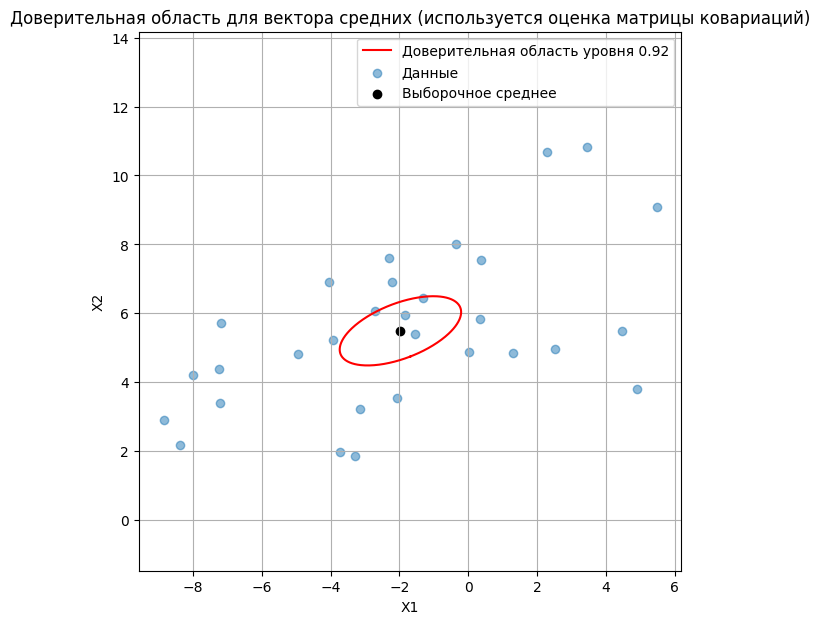

In [144]:
plot_confidence_ellipse_2(df_first, beta=0.92)

## Задание 2

2. Используя генератор стандартных нормальных чисел, получить выборку из $n = 100$ значений многомерной нормальной случайной величины $\{X_4, X_5, X_6\}$ с матрицей ковариаций $A$ (таблица 2) и вектором средних $\mu$ (таблица 3). Используя полученную выборку, на уровне значимости 0,09, проверить гипотезу (в предположении, что данные распределены нормально) о равенстве вектора средних и матрицы ковариаций генеральной совокупности вектору $\mu$ и матрице $A$ соответственно.

In [145]:
cov_second = cov_df.loc[['X4', 'X5', 'X6'], ['X4', 'X5', 'X6']]
mean_second = mu_data[3:6]
alpha = 0.09

# Генерация нормально распределенных векторов
random_norm_vectors = np.random.multivariate_normal(mean_second, cov_second, 100)
random_norm_vectors_df = pd.DataFrame(random_norm_vectors, columns=['X4', 'X5', 'X6'])

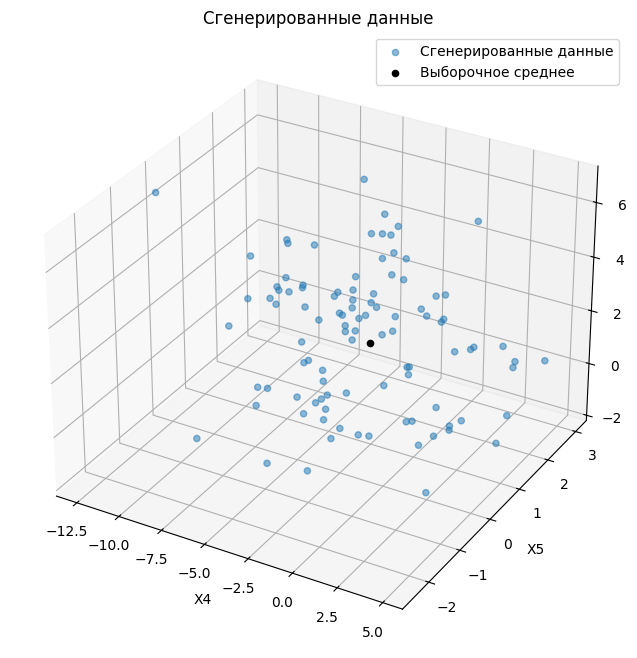

In [146]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(random_norm_vectors_df['X4'],
           random_norm_vectors_df['X5'],
           random_norm_vectors_df['X6'],
           alpha=0.5,
           label='Сгенерированные данные')

ax.scatter(*mean_second, color='black', label='Выборочное среднее')

ax.set_title('Сгенерированные данные')
ax.set_xlabel('X4')
ax.set_ylabel('X5')
ax.set_zlabel('X6')

ax.legend()
plt.show()

**Гипотеза о равенстве вектора средних заданному вектору и матрицы ковариаций заданной матрице**

Пусть $X = \{(X_1^{(1)}, X_2^{(1)},\ldots, X_k^{(1)}), (X_1^{(2)}, X_2^{(2)},\ldots, X_k^{(2)}), \ldots, (X_1^{(n)}, X_2^{(n)},\ldots, X_k^{(n)})\}$ - выборка объема  
$n$ из $k$-мерной нормальной совокупности $N(m, A)$ случайной величины $\xi$.

Проверяется гипотеза

$H_0 : m = m_0, A = A_0$.  

Отношение правдоподобия для $H_0$:

$$ \lambda = |\overline{A} \cdot A_0^{-1}|^{\frac{1}{2} n } \exp \left[ \frac{1}{2} n(k - \mathrm{Tr}(\overline{A} \cdot A_0^{-1}) - (\overline{X} - m_0)^T A_0^{-1}(\overline{X} - m_0)) \right] $$

Положим: $\eta = -2 \ln \lambda$, тогда при истинности $H_0$, статистика $\eta$ будет асимптотически иметь распределение $\chi^2$ c $ \nu = \frac{1}{2} k(k + 1) + k $ степенями свободы.

In [147]:
def get_mean_cov_eta(data, mean, cov_matrix):
  # Выборочная ковариационная матрица
  sample_cov_matrix = np.cov(data, rowvar=False, bias=True)

  # Выборочное среднее
  sample_mean = np.mean(data, axis=0)

  # Размер выборки
  n = data.shape[0]

  # Размерность
  k = data.shape[1]

  my_lambda = (np.linalg.det(sample_cov_matrix @ np.linalg.inv(cov_matrix))**(0.5 * n) *
               np.exp(0.5 * n * (k-np.trace(sample_cov_matrix @ np.linalg.inv(cov_matrix)) -
              (sample_mean - mean).T @ np.linalg.inv(cov_matrix) @ (sample_mean - mean))))

  return -2 * np.log(my_lambda)

In [148]:
chi2_quantile_second = chi2.ppf(1-alpha, df=0.5*3*(3+1)+3)
eta_statistics_second = get_mean_cov_eta(random_norm_vectors, mean_second, cov_second)
print(f'Квантиль распределения хи-квадрат при уровне значимости 0.09: {chi2_quantile_second}')
print(f'Значение статистики: {eta_statistics_second}')

Квантиль распределения хи-квадрат при уровне значимости 0.09: 15.034230669114843
Значение статистики: 12.363098356393895


In [149]:
if eta_statistics_second < chi2_quantile_second:
  print('Принимается нулевая гипотеза.')
else:
  print('Принимается альтернативная гипотеза.')

Принимается нулевая гипотеза.


## Задание 3

3. По двум независимым выборкам объемов $n_1 = 30$, $n_2 = 30$ из многомерных нормальных совокупностей $\{X_1, X_2, X_3\}$ и $\{X_4, X_5, X_6\}$
(таблица 4), на уровне значимости 0,05 проверить гипотезу $H_0$ о равенстве матриц ковариаций $A(X_1, X_2, X_3) = A(X_4, X_5, X_6)$.

In [150]:
df_third_1 = df_new.loc[:, ['X1', 'X2', 'X3']]
df_third_2 = df_new.loc[:, ['X4', 'X5', 'X6']]
alpha = 0.05

**Гипотеза о равенстве матриц ковариаций**

Пусть имеются выборки $X_1, X_2, ... , X_q$ объёмов $n_1, n_2, ... , n_q$ соответственно из $k$-мерных нормальных совокупностей $N(m_1, A_1), N(m_2, A_2), ... , N(m_q, A_q)$.

Проверяется гипотеза $H_0$: $A_1=A_2=...=A_q$.

Отношение правдоподобия:
$$
\lambda = \frac{\prod_{i=1}^q |S_i|^{\frac{n_i-1}{2}}}{|S|^{\frac{n-q}{2}}} ,
$$

где:

* $ S = \frac{1}{n-q} \sum_{i=1}^q (n_i - 1) S_i = \frac{1}{n-q} \sum_{i=1}^q X_i^{\top} X_i $,

* $n = \sum_{i=1}^q n_i$,

* $S_i = \frac{1}{n_i-1} X_i^{\top} X_i $,

* $X_i$ - центрированная матрица i-й выборки.

Если положить $ \rho = 1 - \left( \sum_{i=1}^q \left(\frac{1}{n_i-1}\right) - \frac{1}{n-q} \right) \frac{2k^2 + 3k - 1}{6(k+1)(q-1)} $, то


$ \eta = -2\rho \ln \lambda = \rho \left[ \sum_{i=1}^q (n_i-1) \ln |S_i| - (n-q) \ln |S| \right] $


асимптотически сходится к распределению $ \chi^{2} $ c $ \nu = \frac{1}{2} (q-1)k(k+1) $ степенями свободы.

Таким образом, критерий будет иметь вид:

$$ \delta(X, Y) =
\begin{cases}
H_0, & -2\rho \ln \lambda < \tau_{1-\alpha} \\
H_1, & -2\rho \ln \lambda \geq \tau_{1-\alpha}
\end{cases} $$

где $\tau_{1-\alpha}$ - квантиль распределения $\chi^2$ с $\nu$ степенями свободы.

In [151]:
def get_cov_eta(data_1, data_2, alpha):

  n_1 = data_1.shape[0]
  n_2 = data_2.shape[0]
  n = n_1 + n_2
  k = data_1.shape[1]

  S_1 = data_1.cov().to_numpy()
  S_2 = data_2.cov().to_numpy()
  S = 1/(n-2)*((n_1-1)*S_1 + (n_2-1)*S_2)

  my_lambda = (np.linalg.det(S_1)**((n_1-1)/2) *
               np.linalg.det(S_2)**((n_2-1)/2) /
              (np.linalg.det(S)**((n-2)/2)))

  my_rho = 1 - (1/(n_1-1)+1/(n_2-1)-1/(n-2))*(2*k**2+3*k-1)/(6*(k+1))

  return -2 * my_rho * np.log(my_lambda)

In [152]:
chi2_quantile_third = chi2.ppf(1-alpha, df=(1/2)*(2-1)*3*(3+1))
eta_statistics_third = get_cov_eta(df_third_1, df_third_2, alpha)
print(f'Квантиль распределения хи-квадрат при уровне значимости 0.05: {chi2_quantile_third}')
print(f'Значение статистики: {eta_statistics_third}')

Квантиль распределения хи-квадрат при уровне значимости 0.05: 12.591587243743977
Значение статистики: 6.409963285985701


In [153]:
if eta_statistics_third < chi2_quantile_third:
  print('Принимается нулевая гипотеза.')
else:
  print('Принимается альтернативная гипотеза.')

Принимается нулевая гипотеза.


## Задание 4

4. По выборке объема $n=30$ из многомерной нормальной совокупности $\{X_4,X_5,X_6\}$ (таблица 1) проверить гипотезу о независимости компонент данной совокупности (указать достигнутый уровень значимости).

In [154]:
df_fourth = df.loc[:, ['X4', 'X5', 'X6']]

**Гипотеза о независимости множеств случайных величин**

Пусть $k$-мерный нормальный вектор $\xi$ разбит на $q$ подвекторов $\xi_1, \xi_2, \cdots, \xi_q$ размерности $k_1, k_2, \cdots, k_q$ соответственно. Требуется по выборке $X$ из $n$ значений вектора $\xi$ проверить гипотезу $H_0: \xi_1, \xi_2, \cdots, \xi_q$ взаимно независимы, то есть, $f_{\xi} = f_{\xi_1} \cdot f_{\xi_2} \cdot \cdots \cdot f_{\xi_q}$.

Гипотезу $H_0$ можно также сформулировать как гипотезу, что матрица ковариаций имеет блочно-диагональный вид:

$$ A = \begin{pmatrix} A_{11} & 0 & \cdots & 0 \\ 0 & A_{22} & \cdots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \cdots & A_{qq} \end{pmatrix} $$

где $A_{ii}$ матрица ковариаций подвектора $\xi_i$.

Отношение правдоподобия:

$$ \lambda = \frac{\left| \overline{A} \right|^{\frac{n}{2}}}{\prod_{i=1}^{q} \left| A_{ii} \right|^{\frac{n}{2}}} = \frac{\left| S \right|^{\frac{n}{2}}}{\prod_{i=1}^{q} \left| S_{ii} \right|^{\frac{n}{2}}} $$


где $A_{ii}, S_{ii}$ - выборочные матрицы ковариаций $i$-го подвектора.

Если положить:

$$ \rho = 1 - \frac{2(k^3 - \sum_{i=1}^q k_i^3) + 9(k^2 - \sum_{i=1}^q k_i^2)}{6n(k^2 - \sum_{i=1}^q k_i^2)} $$

то статистика $ \eta = -2\rho \ln \lambda $ будет асимптотически иметь распределение $\chi^2$ с
$ \nu = \frac{1}{2} \left( k^2 - \sum_{i=1}^q k_i^2 \right) $ степенями свободы.

В случае $q = k$ получаем критерий для проверки гипотезы о независимости компонент вектора $\xi$. В этом случае:

$$ \lambda = \frac{\left| \overline{A} \right|^{\frac{n}{2}}}{\prod_{i=1}^{k} \left| \overline{D_{i}} \right|^{\frac{n}{2}}} = \frac{\left| S \right|^{\frac{n}{2}}}{\prod_{i=1}^{k} \left( s_i^2 \right)^{\frac{n}{2}}}, \quad \rho = 1 - \frac{2k + 11}{6n}, \quad \nu = \frac{1}{2} k(k-1) .$$

In [155]:
def get_ind_eta(data):

  n = data.shape[0]
  k = data.shape[1]
  S = data.cov().to_numpy()
  var_lst = [np.std(data.iloc[:, i])**2 for i in range(data.shape[1])]

  my_lambda = np.linalg.det(S)**(n/2)/np.prod(list(map(lambda x: x**(n/2), var_lst)))

  my_rho = 1 - (2*k+11)/(6*n)

  return -2 * my_rho * np.log(my_lambda)

In [156]:
eta_statistics_fourth = get_ind_eta(df_fourth)
p_value = 1 - chi2.cdf(eta_statistics_fourth, df=(1/2)*3*(3-1))
print(f'Значение статистики: {eta_statistics_fourth}')
print(f'Достигнутый уровень значимости: {p_value}')

Значение статистики: 11.015325165035332
Достигнутый уровень значимости: 0.011643294589026798


In [157]:
if p_value < 0.05:
  print('Нулевая гипотеза отклоняется при уровне значимости 0.05')
else:
  print('Нулевая гипотеза принимается при уровне значимости 0.05')

Нулевая гипотеза отклоняется при уровне значимости 0.05


Text(0.5, 1.0, 'Корреляционная матрица')

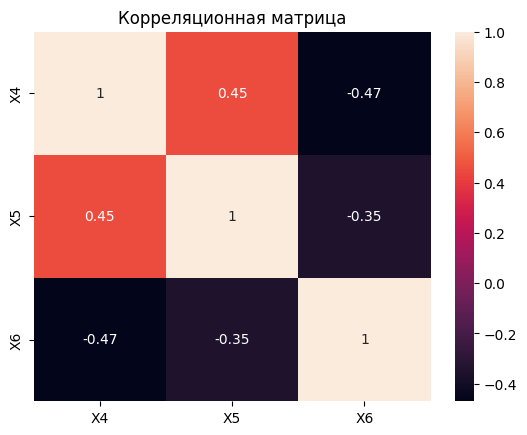

In [158]:
sns.heatmap(df_fourth.corr(), annot=True)
plt.title('Корреляционная матрица')